<a href="https://colab.research.google.com/github/jcriostorres/Modelo-SIR-contagios-UV/blob/master/CV19_UV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Profesor Gabriel Dario Uribe

Luisa Fernanda Arboleda Segura. Ingeniero de Sistemas

Johana Catalina Rios.  Ingeniero de Sistemas

# **Predicción de la progresión de la enfermedad del SARS-CoV-2 según el índice UV y la estacionalidad del CoV humano**

##**Resumen.**

## **I Introducción.**

Este articulo esta constituido con informacón respecto a la reciente pandemia de coronavirus (COVID-19) está teniendo un efecto importante en muchos países, que debe enfrentarse al más alto grado de escrutinio. Una información importante es si la tasa de crecimiento de los casos confirmados entre la población podría disminuir con el aumento de la temperatura. Para lo cual se extrajeron muestras especificas y aplicaron metodo SIR y asi comparar la información obtenida con los antecendentes que se tienen y ver su indice de crecimiento segun la temperatura.


## **II Problematica.**

### **Covid-19, Coronavirus**
Los coronavirus son una familia de virus que pueden causar enfermedades como el resfriado común, el síndrome respiratorio agudo grave (SARS, por sus siglas en inglés).

En diciembre de 2019 hubo un brote epidémico de neumonía de causa desconocida en Wuhan, provincia de Hubei, China; el cual, según afirmó más tarde Reporteros sin Fronteras, llegó a afectar a más de 60 personas el veinte de ese mes.


Este virus ahora se conoce como el síndrome respiratorio agudo grave coronavirus 2 (SARS-CoV-2). La enfermedad que causa se llama enfermedad del coronavirus 2019 (COVID-19). En marzo de 2020 la Organización Mundial de la Salud (OMS) declaró que este brote de COVID-19 es una pandemia.

La mayoría de los virus tienen problemas para sobrevivir en climas secos con luz UV-B o UV-C alta porque ambos dañan su ADN. Esta sensibilidad a la luz ultravioleta es uno de los principales impulsores de la estacionalidad de las infecciones respiratorias virales, que alcanzan su punto máximo en otoño e invierno y se reducen en primavera y verano debido a los niveles variables de infecciones adquiridas en la comunidad (por ejemplo, al tocar superficies infecciosas).

Varios estudios han demostrado una correlación directa entre la luz UV-C y los microorganismos, incluidos los virus en el aire (H1N1, PR-8) donde la tasa de supervivencia fraccional disminuyó sustancialmente para la humedad relativa baja (25%) y la luz UV-C (254 nm ) con una energía superior a 7 J / m2.


## **III Antecedentes.**

El diagrama a continuación muestra el número de ingresos agregados a hospitales en Inglaterra debido al coronavirus humano en relación con el índice UV máximo (fuente NHS Digital y UK Met Office). Se puede observar que la pendiente de la curva de admisión disminuye significativamente a mediados de abril con un aumento promedio de solo 5.07% (5.38%, 4.8%, 5.05%) una vez que el índice UV excede 5.17 (5.3, 5.2, 5.0) y la humedad relativa está por debajo del 80%. Con esto, las infecciones adquiridas en la comunidad desde el exterior disminuirán significativamente y la enfermedad se puede contener si la tasa de infección de persona a persona se puede minimizar a través del distanciamiento social, la inmunidad auditiva y la cuarentena..


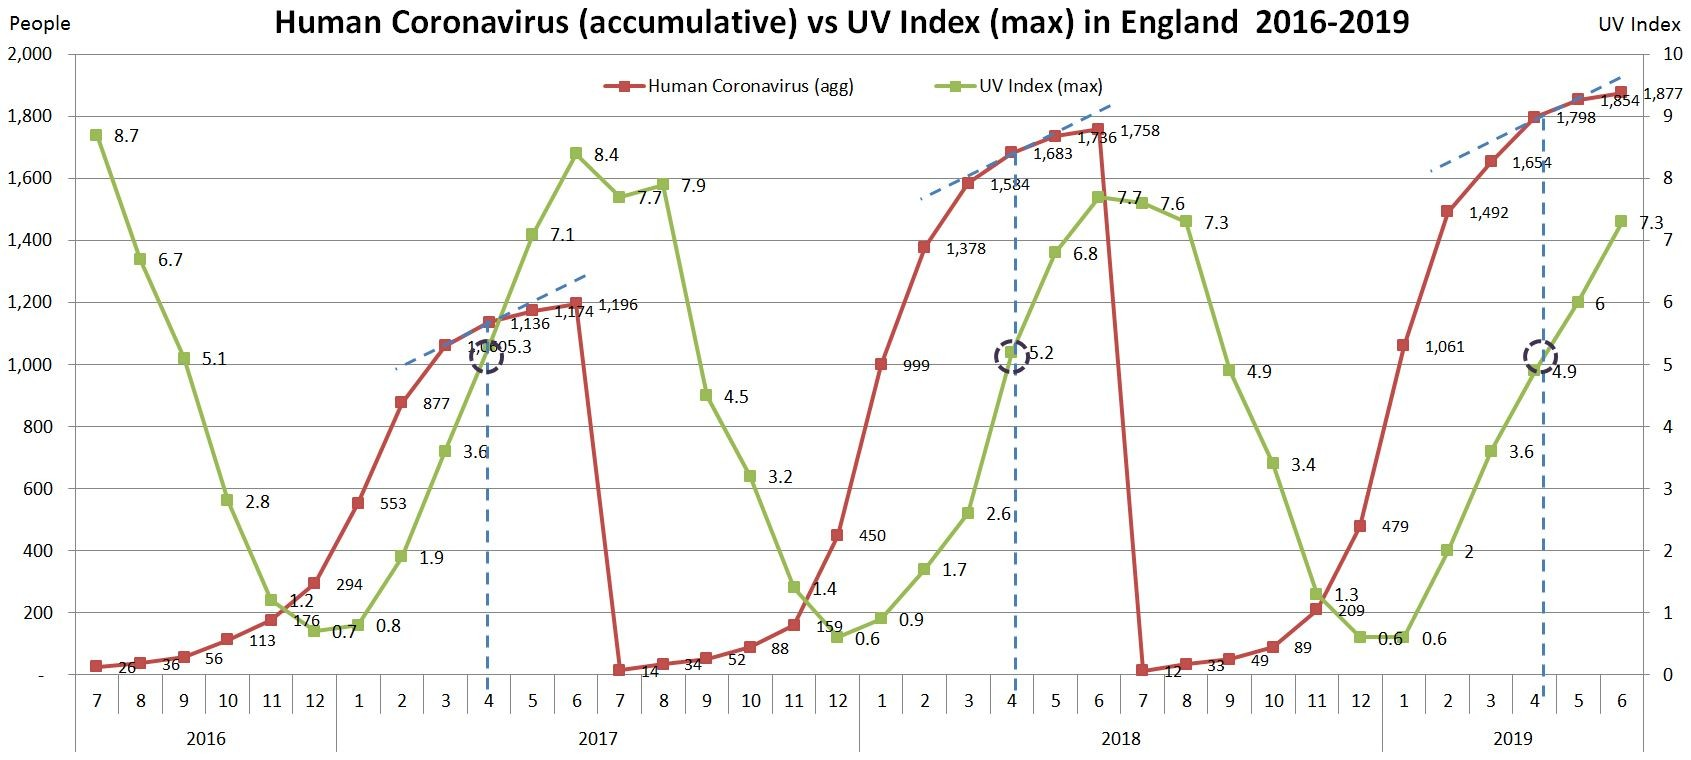

Esto se puede demostrar aún más mediante la observación de la imagen global del brote de SARS-CoV-2 al 31 de marzo de 2020, que se muestra a continuación. La mayoría de las infecciones por SARS-CoV-2 están por encima de la línea de 40 grados y por debajo de la línea de -40 grados con un índice UV que oscila entre 5 y 0. Las infecciones también son visibles en regiones con alta intensidad UV donde la propagación del virus es predominantemente a través del contacto de persona a persona, lugares sombreados y dentro de edificios con aire acondicionado en lugar de gotas en las superficies externas o en el aire. 



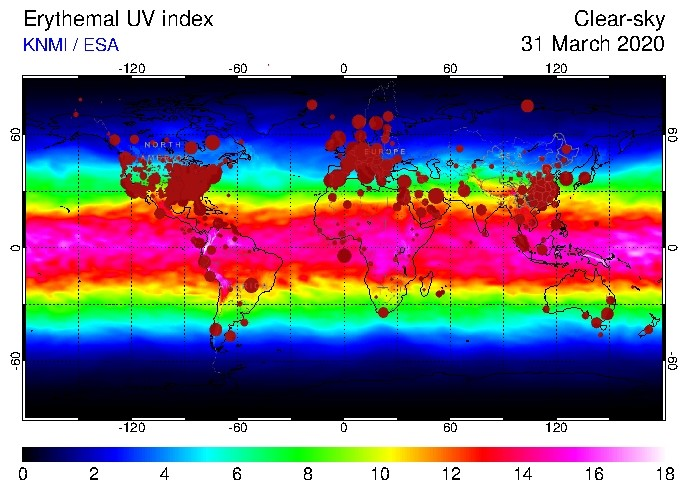

Con el aumento del índice UV durante el período de primavera, la tasa de infección adquirida en la comunidad se reduce debido a la naturaleza destructiva de la luz UV-B en el ADN de la familia Coronavirus.[1]

## **IV Selección y Extracción de Características**

**Dada la tabla, de los datos recopilados en el mes de abril- Mayo del 2020 en el pais de Espana de la temperatura y el numero de contagios.**

In [0]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import RK45

**Se modificaronn los datos de numero de contagios para poder mostrar adecuadadmente la relacion entre la temperatura o exposicion de los rayos UV y los contagios en una misma grafica.**

In [148]:
from datetime import datetime, timedelta
inicio=datetime(20,4,1)
fin=datetime(20,5,26)
list_fechas=[(inicio + timedelta(days=d)).strftime("%Y-%m-%d") for d in range((fin - inicio).days + 1)] 
Contagios=[74.13, 75.83, 72.72, 66.63, 55.33, 36.67,52.09 ,55.83 , 57.45,45.37,45.50 ,38.99 , 30.30, 31.16,44.24 , 38.20,38.18, 38.36,7.13 ,22.18 ,29.51 ,23.12 , 29.16,21.14 ,25.06 ,16.41 ,16.60 ,15.25 ,8.47 ,12.41, 13.87, 12.34, 9.35, 4.66, 10.39, 8.80, 9.21, 11.73, 7.43, 17.50, 3.93, 4.82, 4.39, 8.49, 6.43, 5.15, 6.52, 2.56, 4.31, 5.18, 4.82, 17.87, 4.66, 4.82, 3.72, 8.59]
Temperatura=[12, 15 ,14, 16, 16, 16, 17, 21,16 ,16 , 17, 18, 16 ,17, 15, 17,16 ,19 ,16 ,17 ,16, 18 ,20 ,20 ,21 , 18, 15,15 ,17 , 17, 19, 26, 29, 26, 24, 25, 25, 28, 20, 18, 18, 16, 17, 15, 18, 18, 23, 28, 29, 29, 31, 32, 32, 31, 28, 26]
df=pd.DataFrame({'Abril-Mayo':list_fechas,'Contagios':Contagios, '°C':Temperatura})
df

,Abril-Mayo,Contagios,°C
0,20-04-01,74.13,12
1,20-04-02,75.83,15
2,20-04-03,72.72,14
3,20-04-04,66.63,16
4,20-04-05,55.33,16
5,20-04-06,36.67,16
6,20-04-07,52.09,17
7,20-04-08,55.83,21
8,20-04-09,57.45,16
9,20-04-10,45.37,16


Tomamos como referencia para realizar este modelo de predicción los números diarios de contagios y de la temperatura promedio como indicador del indice UV, de los meses de abril y mayo en pais de **España** y veremos como el aumento de la temperatura en el ambiente reduce las infecciones por SARS-CoV-2.

podemos observar los picos de aumento de temperatura (linea Roja), disminuyen los contagios  (linea Azul), teniendo en cuenta que el periodo de incubación de virus en promedio 2 a 14 días en España. 

([<matplotlib.axis.XTick at 0x7f1ed68f2588>,
 <a list of 56 Text major ticklabel objects>)

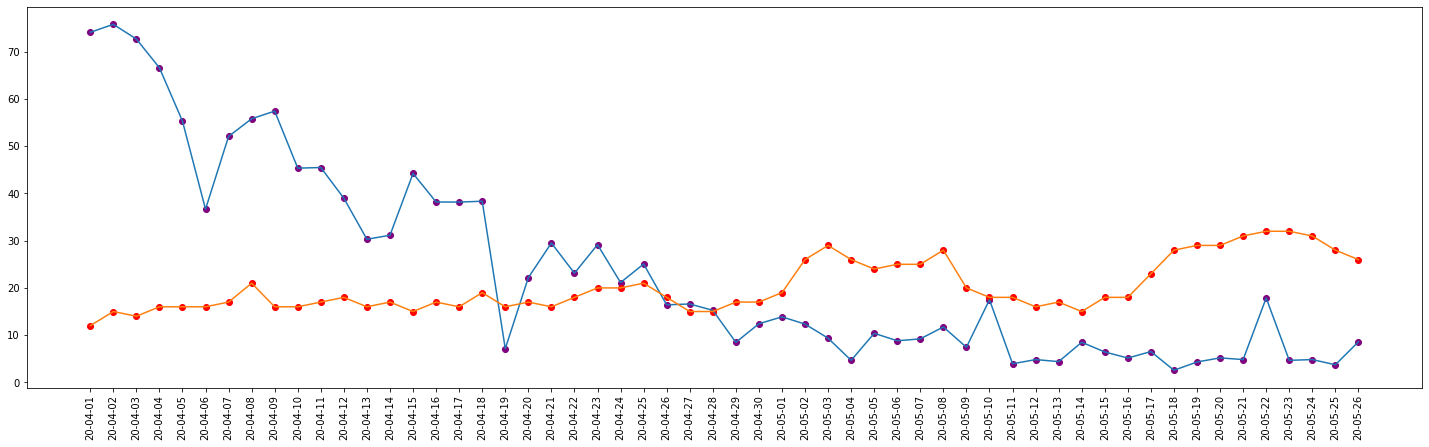

In [149]:
plt.plot(list_fechas,Contagios, label="Contagios")
plt.plot(list_fechas,Temperatura, label="Temperatura")
plt.scatter(list_fechas, Contagios, color='purple')
plt.scatter(list_fechas, Temperatura, color='r')

plt.rcParams['figure.figsize'] = (20, 7)
plt.xticks(list_fechas,rotation=90)


## **V Experimento**

### **Modelo SIR**.
Este virus ahora se conoce como el síndrome respiratorio agudo grave coronavirus 2 (SARS-CoV-2). Considerando que España impuso una cuarentena nacional desde el 15 de marzo. El anuncio vino seguido de un aumento significativo en la cantidad de casos confirmados por COVID-19 en España. Parte de la población española tuvo dificultad para acatar las medidas de dicha cuarentena.

El objetivo de este trabajo es escribir modelo matematico capas de predecir e idear medidas eficaces de control y eredicacion del (SARS-CoV-2), A medida que se trata a un paciente, el modelo SIR calcula la tasa de infección y recuperación en promedio en una población específica.

considerar una poblacion tamaño **N = n + a** donde N es la poblacion suceptible inicialmente S(0) y a es la poblacion infectada I(0)

* S(t) = numero de poblacion suceptibles
* I(t) = numero de poblacion infectada
* R(t) = numero de poblacion Recuperados

Modelo:  

$\alpha$: Razón de cambio de infectados
$\beta$: razón de cambio de recuperados 
 

Ecuaciones (ODE):
\begin{align*}
& \frac{\mathrm{d}S}{\mathrm{d}T}= - \alpha S I  \\
& \frac{\mathrm{d}I}{\mathrm{d}T}= \alpha S I - \beta I  \\
& \frac{\mathrm{d}R}{\mathrm{d}T}= \beta I  \\
 \\
\end{align*}

donde $N=S+I+R$ es la poblacion, $T$ es el lapso de tiepo desde la fecha de inicio.


In [150]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

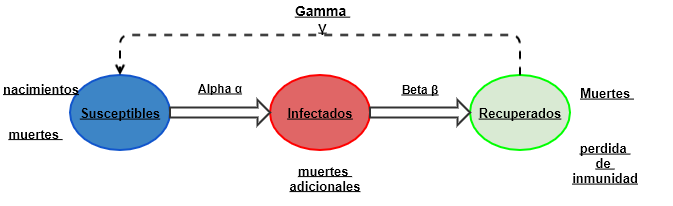

In [151]:
Image('esquemaSIR.png', width = 700)

In [152]:
from datetime import datetime, timedelta
inicio=datetime(2020,2,1)
fin=datetime(2020,5,26)
list_fechas3=[(inicio + timedelta(days=d)).strftime("%Y-%m-%d") for d in range((fin - inicio).days + 1)] 
Susceptibles3=[46899999,46899998,46899997,46899996,46899995,46899994,46899993,46899992,46899991,46899990,46899988,46899986,46899984,46899982,46899980,46899978,46899976,46899974,46899972,46899970,46899968,46899966,46899964,46899962,46899960,46899957,46899948,46899931,46899896,46899842,46899760,46899624,46899432,46899165,46898817,46898286,46897522,46898450,46897566,46896543,46895384,46893849,46891842,46889698,46887979,46884978,46881231,46877158,46872108,46866125,46860809,46855383,46847253,46837127,46826525,46815002,46803830,46794982,46787098,46776474,46765673,46753994,46742952,46732583,46757389,46717165,46709185,46698789,46688900,46680860,46672869,46665688,46660322,46654429,46646656,46638892,46636908,46631373,46629391,46623943,46619065,46613352,46607101,46601882,46596023,46591358,46587555,46584357,46577111,46572767,46568533,46564948,46562359,46559452,46556270,46552874,46549444,46545634,46542087,46536457,46535091,46532818,46530486,46527086,46525034,46522856,46519074,46518018,46517587,46517069,46516587,46514800,46514334,46513852,46514224,46513365]
Infectados3=[1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,9,17,35,54,82,136,192,267,348,531,764,1094,1527,2299,3274,4427,5958,7641,9785,11491,13994,17688,21735,26304,31750,36616,41262,48953,57506,66460,75641,83885,90309,96122,104267,111680,119263,126535,133198,138731,142398,147607,153190,158935,163472,168022,171921,174951,178067,182491,186311,190129,193965,193252,195470,198421,200733,203649,205763,208269,209910,211570,213095,213942,215183,216570,217804,218739,219205,220244,221124,222045,223218,223961,227377,227770,228252,228691,229540,230183,230698,231350,231606,232037,232555,233037,234824,235290,235772,235400,236259]
Recuperados3=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,135,183,189,193,517,517,530,1028,1081,1107,1588,2125,2575,3355,3794,5367,7015,9357,12285,14709,16780,19259,22647,26743,30513,34219,3880,40437,43208,48021,52165,55668,59109,62391,64727,67504,70853,74797,72963,74662,77357,80587,82514,85915,89250,92355,95708,98732,100875,102548,108947,112050,114897,117248,118902,121343,123486,126002,128511,131148,133952,136166,137139,138930,140823,143374,144783,146446,149576,150376,150376,150376,150376,150376,150376,150376,150376,150376]
df=pd.DataFrame({'Fecha':list_fechas3,'Susceptibles3': Susceptibles3,'Infectados3': Infectados3,'Recuperados3':Recuperados3})
df

,Fecha,Susceptibles3,Infectados3,Recuperados3
0,2020-02-01,46899999,1,0
1,2020-02-02,46899998,1,0
2,2020-02-03,46899997,1,0
3,2020-02-04,46899996,1,0
4,2020-02-05,46899995,1,0
...,...,...,...,...
111,2020-05-22,46514800,234824,150376
112,2020-05-23,46514334,235290,150376
113,2020-05-24,46513852,235772,150376
114,2020-05-25,46514224,235400,150376


# GRÁFICA DE LOS DATOS DE LA TABLA

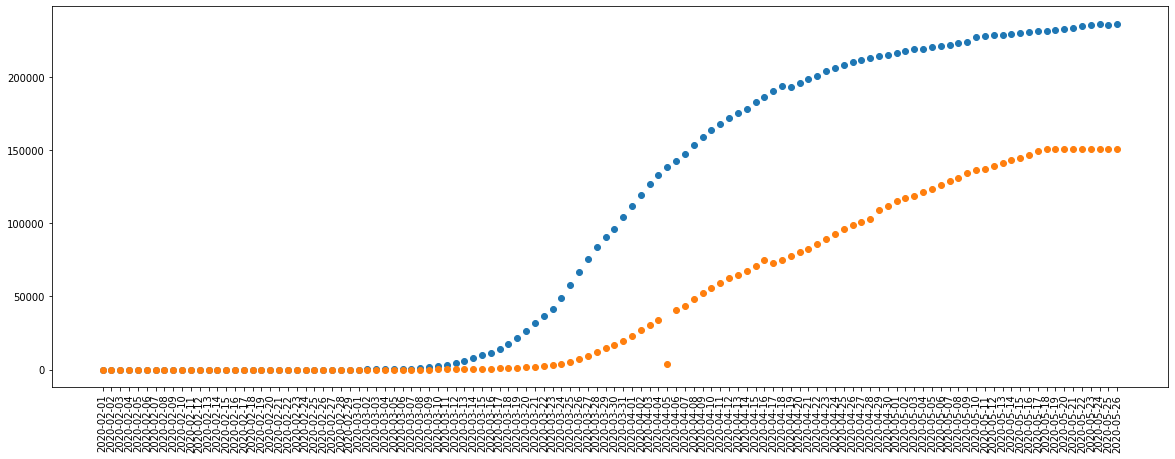

In [153]:
#plt.scatter(list_fechas3, Susceptibles3)
plt.scatter(list_fechas3, Infectados3) 
plt.scatter(list_fechas3, Recuperados3)
plt.xticks(list_fechas3,rotation=90)
plt.rcParams['figure.figsize'] = (15, 6)

In [184]:
a= 0.09
b= 0.0036

def dP_dt(P, t):
    return [-a*P[0]*P[1], a*P[0]*P[1]-b*P[1],b*P[1]]

ts = np.linspace(0, 120, 120)
P0 = [46899999, 1, 0]
Ps = odeint(dP_dt, P0, ts)
S= Ps[:,0]
I= Ps[:,1]
R= Ps[:,2]
print(Ps)

[[ 4.68999990e+07  1.00000000e+00  0.00000000e+00]
 [ 4.10173020e-22  4.67300505e+07  1.69949452e+05]
 [ 8.90002106e-23  4.65607162e+07  3.39283766e+05]
 [-1.03394700e-25  4.63919955e+07  5.08004469e+05]
 [ 8.51239876e-27  4.62238862e+07  6.76113783e+05]
 [ 4.66518093e-26  4.60563861e+07  8.43613923e+05]
 [-2.71356124e-26  4.58894929e+07  1.01050710e+06]
 [-1.72431471e-26  4.57232045e+07  1.17679551e+06]
 [ 4.74558802e-28  4.55575187e+07  1.34248135e+06]
 [ 2.96115640e-26  4.53924332e+07  1.50756680e+06]
 [ 1.72818481e-25  4.52279460e+07  1.67205403e+06]
 [ 1.49978976e-25  4.50640548e+07  1.83594521e+06]
 [ 1.46004587e-27  4.49007575e+07  1.99924250e+06]
 [ 1.24632833e-25  4.47380519e+07  2.16194806e+06]
 [ 2.17818386e-25  4.45759360e+07  2.32406403e+06]
 [ 2.66629716e-25  4.44144075e+07  2.48559254e+06]
 [ 2.52354866e-25  4.42534643e+07  2.64653573e+06]
 [ 6.00839938e-26  4.40931043e+07  2.80689571e+06]
 [-1.17011431e-25  4.39333254e+07  2.96667460e+06]
 [-1.75680484e-25  4.37741255e+

# **MODELO PREDICCIÓN SIR**

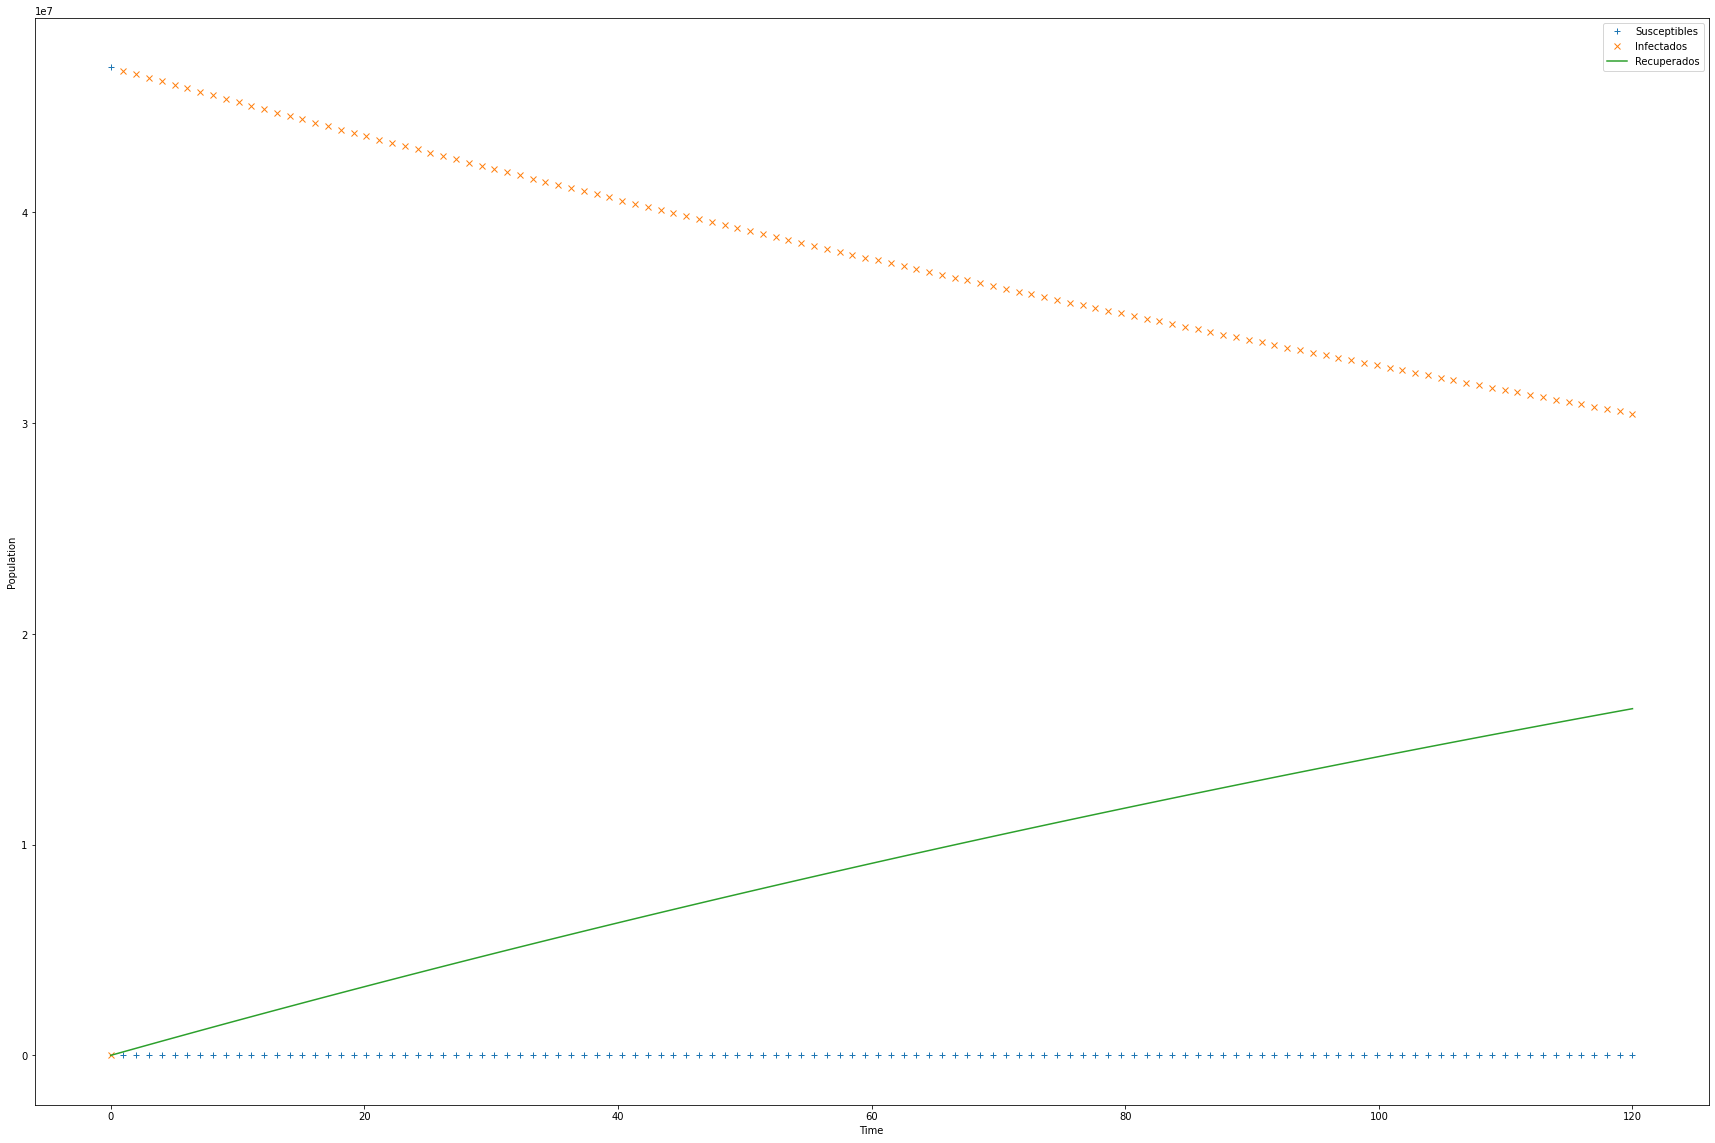

In [189]:
plt.plot(ts,S, "+", label="Susceptibles")
plt.plot(ts,I, "x", label="Infectados")
plt.plot(ts,R, "-", label="Recuperados")

#plt.scatter(df.index,df['Susceptibles3'])
#plt.scatter(df.index,df['Infectados3'])
#plt.scatter(df.index,df['Recuperados3'])

#plt.scatter(list_fechas3, Infectados3)
#plt.xticks(df.index,rotation=90)
plt.xlabel("Time")
plt.ylabel("Population")

plt.rcParams['figure.figsize'] = (30, 20)
plt.legend()
#plt.show()

* Población de Espana es de almenos 47 millones habitantes

## **VI Dicusíon**

##Los siguientes puntos clave son de interés:


Al predecir el índice UV entre junio y julio de 2020, puede llegar a 5.0 el 26 de julio, donde un aumento de solo el 5.07% de los casos nuevos proporciona un punto valioso para la predicción de la curva de progresión de la enfermedad en el España. Con este enfoque, se pueden estimar muchos puntos de datos para la predicción de la progresión de la enfermedad utilizando las tasas de admisión históricas de hCoV y los datos del índice UV.a  y la temperatura temperatura.

Este trabajo demuestra que un pais como Colombia que recive permanentemente rayos UV los 365 dias al año por estar en la linea ecuatorial, no es necesario una cuarentena tan extensa y estricta. Prohibir a las personas a salir a trabajar o realizar sus ejercicios fisicos al aire libre, hace que se afecten fisica y mentalmente, de esta manera atrasa enormemente el contagio, traumatizando el funcionamiento de la economia y el bienestar de las personas.

La Organización Mundial de la Salud descalifica y no promueve este tipo de investigaciones cientificas. China y la OMS tiene una gran deuda con el mundo y mucho por explicar que fue realmente paso con este nuevo virus y porque no tomo las medidas necesarias en el momento de la propagación en Wuhan.

Un punto importante en el continente Europeo especialmente España e Italia que fueron los mas afectados por muertes y contagios, antes del nuevo virus Chino el envejecimiento de Europa era un fenómeno demográfico y social caracterizado por un declive de la tasa de fecundidad, un declive de la tasa de mortalidad y una esperanza de vida creciente en Europa.


## **VII Concluciónes**

- Utilizamos modelos como Depredor presa, modelo de crecimiento de población, pero el modelo que nos ayudo a desmotrar la reducción de contagio fue con el modelo SIR.
- Este trabajo demuestra que en paises donde  se presentan Estaciones como en los hemisferios norte y sur, el invierno es donde presenta alto nivel de contagio de Coronavirus y el verano el virus va desapareciendo, es por eso que en los paises norticos la vida normal ha vuelto casi a la normalidad y la  economias esta abierta, pero se debe tomar medidas de precaución de contagio en interiores con sistemas de calefacccion o aire acondicionados.

- La exposición a la luz solar es fundamental para una respuesta inmune adecuada

- Es muy escaso encontrar los datos diarios de las personas recuperadas del virus Covid 19 en todo el mundo.



## **VIII Referencias Bibliograficas**

*   [1]«Predicting the SARS-CoV-2 Disease Progression based on the UV Index and Seasonality of the Human CoV». https://www.linkedin.com/pulse/predicting-sars-cov-2-disease-progression-based-uv-index-braun


*   [2]«La exposición a la luz solar es fundamental para una respuesta inmune adecuada». https://www.abc.es/salud/habitos-vida-saludable/abci-exposicion-solar-fundamental-para-respuesta-inmune-adecuada-201612201217_noticia.html?ref=https:%2F%2Fwww.google.com%2F


*   [3]«Radiación UV del sol podría reducir el factor de contagio del Coronavirus - ClimaYa». https://climaya.com/2020/04/radiacion-uv-del-sol-podria-reducir-el-factor-de-contagio-del-coronavirus/?fbclid=IwAR2GIVlIBuDHFBwYp8t70QddFJmPsR-MkQjXRAF9fRvnlqZ1yLgdQKBT0Rk 


*   [4]«• Coronavirus: recuperados por día España 2020 | Statista». https://es.statista.com/estadisticas/1104279/personas-con-covid-19-recuperadas-por-dia-espana/


*   [5]«Daily confirmed COVID-19 cases», Our World in Data. https://ourworldindata.org/grapher/daily-cases-covid-19



*   [6]«Coronavirus (COVID-19) - Google Noticias», Google Noticias. https://news.google.com/covid19/map?hl=es-419&gl=US&ceid=US:es-419


*   [7]«Archivo meteorológico Bogotá», meteoblue. https://www.meteoblue.com/es/tiempo/historyclimate/weatherarchive/bogot%c3%a1_colombia_3688689









